# Financial fraud detection 

In this Notebook I am going to detail my approach to building an algorithm for detecting financial fraud using SMOTE-enhanced fraud data and logistical regression.

The dataset used will be the kaggle financial fraud dataset by ULB, accessible from the following link: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Import packages used and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabular import tabular

In [25]:
df=pd.read_csv(
    r"C:\Users\computer\Documents\Python\Credit Cards\creditcard.csv")

## Data exploration

In [20]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The dataset consists of 28 anonymised feature vectors obtained by performing PCA on the original data. Additionally, we have a relative unit of time passage, the amount of the transaction, and a classifier of whether the entry represents a fraudulent transaction or not.

In [22]:
with pd.option_context("display.max_columns",df.shape[0]):
    print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

The above statistics describe the data briefly. We see that overall the anonymised features seem relatively well behaved, with similar variance and means across them, similar maximum and minimum values, and no obvious sign of outliers.

We see that Amount seems to be strongly positively skewed. The minimum is very close to the median value, and the median is 4 times lower than the mean, both of which suggest a dataset with multitudes of small observations and a small minority of very large ones.

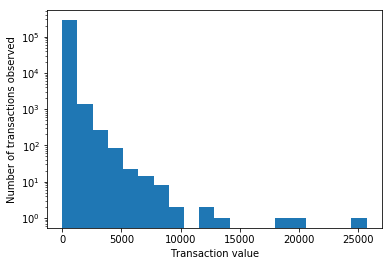

In [38]:
plt.hist(df["Amount"].values,log=True,bins=20)
plt.xlabel("Transaction value")
plt.ylabel("Number of transactions observed")
plt.show()

A histogram of the transaction amounts seems to confirm this reading of the data. The number of transactions decreases exponentially in amount until about 10,000. Only about a handful of transactions exceed this value. 

In [ ]:
n=plt.hist(df["Time"].values,bins=48,histtype='bar')
plt.xlabel("Time since first transaction in dataset")
plt.ylabel("Number of transactions observed")
plt.show()
print(tabular([n[1],n[2]],headers=["Day 1","Day 2"]))

There is a noticable seasonal pattern in the timing of the transactions. Since this data covers transactions over two days, this seems to conform to an intuitive understanding of consumer behaviour:
 - from midnight until early morning, the number of transactions keeps falling.
 - beginning from mid-morning the transactions rate accelerates euickly to a peak which remains relativly steady throughout the day.
 - late in the evening, from around 9pm, transactions slow down as quickly as they started up in the morning, reaching a minimum soon after midnight, when the cycle then repeats